Laborbericht IMG60  
Klassifikation mit R

Justin Stange-Heiduk  
8149363  
Data Science B.Sc


Erstellt am 09.08.2024  
Zuletzt bearbeitet am 09.08.2024

In [32]:
# Laden der Pakete
library(ggplot2)
library(gridExtra)
library(ggplot2)
library(reshape2)

In [33]:
# Einlesen der Daten
data <- read.csv("Daten.csv", header = TRUE, sep = ",")
# Ausgabe Ausprägungen von den Merkmalen


# Datenexploration

In [34]:
# Ausgabe der ersten 15 Datensätze
head(data, 10)

,Alter,Einkommen,Abschluss,Geschlecht,Wohngebiet,Stellung,Eigenheim,Kinderanzahl,Familienstand,Bundesland,MitgliedSportverein,Krankheitstage,Preiskategorie
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>
1,32,33812,Keiner,w,Kleinstadt,Selbststaendig,n,0,ledig,Schleswig-Hollstein,j,4,hoch
2,30,33284,Studium,w,Grossstadt,Arbeiter,n,1,geschieden,Hamburg,n,5,mittel
3,40,32112,Realschule,w,Grossstadt,Angestellter,n,0,verheiratet,Saarland,j,7,hoch
4,29,26957,Hauptschule,w,Kleinstadt,Angestellter,n,2,ledig,Rheinland-Pfalz,j,3,hoch
5,34,114385,Realschule,w,Kleinstadt,Beamter,n,3,ledig,Thueringen,j,2,hoch
6,31,27615,Gymnasium,w,Grossstadt,Angestellter,n,2,ledig,Baden-Wuerttemberg,n,3,mittel
7,38,43917,Realschule,w,Dorf,Selbststaendig,n,1,verwitwet,Sachsen,n,2,niedrig
8,36,71120,Hauptschule,m,Grossstadt,Angestellter,n,2,geschieden,Bayern,n,9,niedrig
9,36,25712,Studium,m,Grossstadt,Arbeiter,n,0,geschieden,Berlin,n,1,niedrig


In [35]:
# Ausgabe der Spaltennamen
colnames(data)

[1] "Alter"               "Einkommen"           "Abschluss"          
 [4] "Geschlecht"          "Wohngebiet"          "Stellung"           
 [7] "Eigenheim"           "Kinderanzahl"        "Familienstand"      
[10] "Bundesland"          "MitgliedSportverein" "Krankheitstage"     
[13] "Preiskategorie"

In [36]:
# Anzahl der Zeilen der Daten
nrow(data)

[1] 652

In [37]:
# Ausgabe Ausprägungen von den Merkmalen
for (col in colnames(data)) {
    print(paste("Spalte:", col))
    print(table(data[[col]]))
}



[1] "Spalte: Alter"

21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 
 1  2  3  6  8 13 24 24 23 29 56 47 49 51 47 55 34 46 36 31 23 14 15  4  4  1 
47 48 49 
 3  1  2 
[1] "Spalte: Einkommen"

 12545  13804  13827  14217  15195  15496  16376  16799  16888  16939  17129 
     2      1      1      1      2      1      1      1      1      1      1 
 17170  17463  17600  17928  18401  18476  18534  18615  18729  18761  19015 
     1      1      2      1      1      1      1      1      1      1      1 
 19094  19422  19665  20258  20460  20640  20747  20832  21275  21368  21497 
     1      2      1      1      1      1      1      1      2      1      1 
 21499  21659  21703  21807  22147  22369  22434  22904  22913  23080  23113 
     1      1      1      1      1      1      1      1      2      1      1 
 23127  23301  23524  23759  23939  24006  24140  24183  24264  24278  24415 
     1      1      1      1      1      1      1      1      2      1     

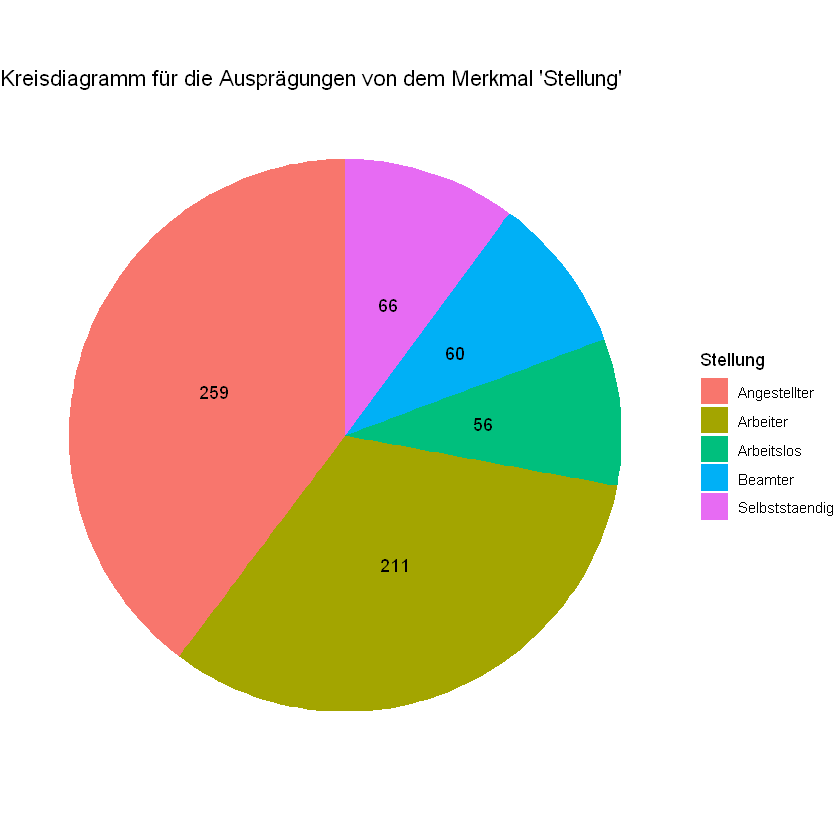

In [38]:
# Kreisdiagramm für die Ausprägungen von dem Merkmal 'Stellung'
ggplot(data, aes(x = "", fill = Stellung)) +
    geom_bar(width = 1) +
    coord_polar("y") +
    theme_void() +
    labs(title = "Kreisdiagramm für die Ausprägungen von dem Merkmal 'Stellung'") +
    geom_text(aes(label = ..count..), stat = "count", position = position_stack(vjust = 0.5))

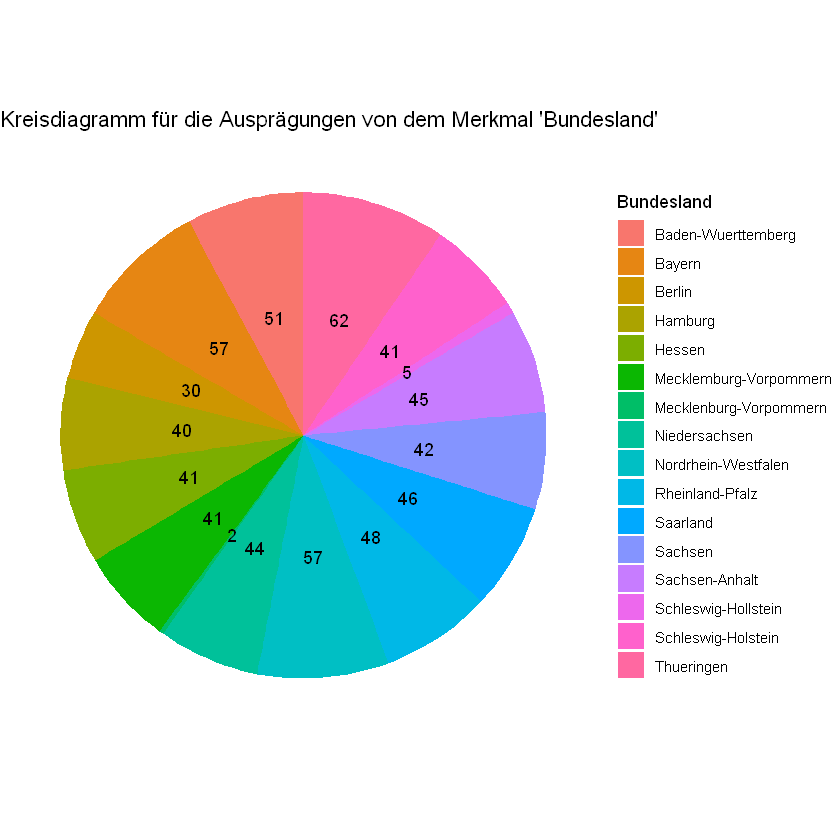

In [39]:
# Kreisdiagramm für die Ausprägungen von dem Merkmal 'Bundesland'
ggplot(data, aes(x = "", fill = Bundesland)) +
    geom_bar(width = 1) +
    coord_polar("y") +
    theme_void() +
    labs(title = "Kreisdiagramm für die Ausprägungen von dem Merkmal 'Bundesland'") +
    geom_text(aes(label = ..count..), stat = "count", position = position_stack(vjust = 0.5))

# Datenvorbereitung und -verarbeitung

In [40]:
# Überprüfen ob fehlende Werte vorhanden sind
sum(is.na(data))

[1] 0

In [41]:
# Ändere den Namen der Ausprägung Mecklemburg-Vorpommern in Mecklenburg-Vorpommern sowie Schleswig-Hollstein in Schleswig-Holstein
data$Bundesland[data$Bundesland == "Mecklemburg-Vorpommern"] <- "Mecklenburg-Vorpommern"
data$Bundesland[data$Bundesland == "Schleswig-Hollstein"] <- "Schleswig-Holstein"

# Test- und Trainingsdatensplit

In [85]:
# Funktion, die Daten in 80% Trainingsdaten und 20% Testdaten aufteilt
split_data <- function(data, train_ratio = 0.8) {
    set.seed(13)  # Für Reproduzierbarkeit
    total_rows <- nrow(data)
    train_indices <- sample(1:total_rows, size = total_rows * train_ratio)
    train_data <- data[train_indices, ]
    test_data <- data[-train_indices, ]
    return(list(train_data = train_data, test_data = test_data))
}

# Beispielverwendung
split <- split_data(data)
train_data <- split$train_data
test_data <- split$test_data

# # Die ersten 10 Zeilen der Trainingsdaten drucken
# print("Die ersten 5 Zeilen der Trainingsdaten:")
# head(train_data, 5)

# # Die ersten 5 Zeilen der Testdaten drucken
# print("Die ersten 10 Zeilen der Testdaten:")
# head(test_data, 5)

# Anzahl der Zeilen der Trainings- und Testdaten drucken
print(paste("Anzahl der Zeilen der Trainingsdaten:", nrow(train_data)))
print(paste("Anzahl der Zeilen der Testdaten:", nrow(test_data)))


[1] "Anzahl der Zeilen der Trainingsdaten: 521"
[1] "Anzahl der Zeilen der Testdaten: 131"


# Entscheidungsbaum Implementierung

In [112]:
create_decision_tree <- function(dataX, dataY, max_depth, min_samples, min_gain) {
  

  
  # Sicherstellen, dass alle numerischen Spalten als numerisch behandelt werden
  dataX[] <- lapply(dataX, function(col) {
  if (is.factor(col) || is.character(col)) {
    return(col)
  } else {
    return(as.numeric(as.character(col)))
  }
  })
  
  # Berechnung der Entropie
  entropy <- function(x) {
  freq <- table(x) / length(x)
  freq <- freq[freq > 0]  # Entferne Null-Frequenzen
  -sum(freq * log2(freq))
  }

  # Berechnung des Informationsgewinns (Gain)
  gain <- function(dataX, dataY, attribute, threshold = NULL) {
  if (is.null(threshold)) {
    values <- unique(dataX[[attribute]])
    weighted_entropy <- 0
    
    for (val in values) {
    subset_dataY <- dataY[dataX[[attribute]] == val]
    weighted_entropy <- weighted_entropy + (length(subset_dataY) / length(dataY)) * entropy(subset_dataY)
    }
  } else {
    subset_dataY_leq <- dataY[dataX[[attribute]] <= threshold]
    subset_dataY_gt <- dataY[dataX[[attribute]] > threshold]
    
    weighted_entropy <- (length(subset_dataY_leq) / length(dataY)) * entropy(subset_dataY_leq) +
              (length(subset_dataY_gt) / length(dataY)) * entropy(subset_dataY_gt)
  }
  
  entropy(dataY) - weighted_entropy
  }

  # Berechnung der Split-Information
  split_info <- function(dataX, dataY, attribute, threshold = NULL) {

  if (is.null(threshold)) {
    freq <- table(dataX[[attribute]]) / nrow(dataX)
  } else {
    freq <- c(length(dataX[dataX[[attribute]] <= threshold, ]) / nrow(dataX), 
        length(dataX[dataX[[attribute]] > threshold, ]) / nrow(dataX))
  }
  freq <- freq[freq > 0]  # Entferne Null-Frequenzen
  -sum(freq * log2(freq))
  }

  # Berechnung des Gain-Ratio
  gain_ratio <- function(dataX, dataY, attribute, threshold = NULL) {
  g <- gain(dataX, dataY, attribute, threshold)
  si <- split_info(dataX, dataY, attribute, threshold)
  if (si == 0) {
    return(0)
  }
  gr <- g / si
  # if (!is.null(threshold)) {
  #   cat(sprintf("Gain für %s mit Schwellenwert %s: %.4f\n", attribute, threshold, g))
  #   cat(sprintf("SplitInfo für %s mit Schwellenwert %s: %.4f\n", attribute, threshold, si))
  #   cat(sprintf("Gain Ratio für %s mit Schwellenwert %s: %.4f\n", attribute, threshold, gr))
  # } else {
  #   cat(sprintf("Gain für %s: %.4f\n", attribute, g))
  #   cat(sprintf("SplitInfo für %s: %.4f\n", attribute, si))
  #   cat(sprintf("Gain Ratio für %s: %.4f\n", attribute, gr))
  # }
  if (is.null(threshold)) {
    cat(sprintf("Gain für %s: %.4f\n", attribute, g))
    cat(sprintf("SplitInfo für %s: %.4f\n", attribute, si))
    cat(sprintf("Gain Ratio für %s: %.4f\n", attribute, gr))
  }
  return(gr)
  }

  # Funktion, um den besten Split für kontinuierliche Attribute zu finden
  best_split <- function(dataX, dataY, attribute, min_samples) {
  unique_vals <- sort(unique(dataX[[attribute]]))
  thresholds <- (unique_vals[-1] + unique_vals[-length(unique_vals)]) / 2
    
    # Filtere Schwellenwerte, um sicherzustellen, dass beide Teilmengen mindestens min_samples haben
    valid_thresholds <- thresholds[sapply(thresholds, function(th) {
      left_count <- sum(dataX[[attribute]] <= th)
      right_count <- sum(dataX[[attribute]] > th)
      left_count >= min_samples && right_count >= min_samples
    })]
    
    if (length(valid_thresholds) == 0) {
      cat(sprintf("Keine gültigen Schwellenwerte für %s gefunden. Setze Gain Ratio auf -1.\n", attribute))
      if (all(sapply(thresholds, function(th) length(dataX[dataX[[attribute]] <= th, ]) < min_samples || length(dataX[dataX[[attribute]] > th, ]) < min_samples))) {
        cat("Grund: Nicht genügend Datensätze für min_samples.\n")
      }
      return(list(threshold = NULL, gain_ratio = -1))
    }
    
    cat(sprintf("Gültige Schwellenwerte für %s: %s\n", attribute, paste(valid_thresholds, collapse = ", ")))
    
    gains <- sapply(valid_thresholds, function(th) gain_ratio(dataX, dataY, attribute, th))

    if (all(gains < min_gain)) {
      cat(sprintf("Keine gültigen Schwellenwerte für %s gefunden. Setze Gain Ratio auf -1.\n", attribute))
      cat("Grund: Gain Ratio unter min_gain.\n")
      return(list(threshold = NULL, gain_ratio = -1))
    }
    
    best_threshold <- valid_thresholds[which.max(gains)]
    best_gain <- max(gains)
    
    # Ausgabe der Gain, SplitInfo und Gain Ratio für den besten Schwellenwert
    gain(dataX, dataY, attribute, best_threshold)
    split_info(dataX, dataY, attribute, best_threshold)
    gain_ratio(dataX, dataY, attribute, best_threshold)

    # Ausgabe der Anzahl der Datensätze für jeden Schwellenwert
  # for (th in valid_thresholds) {
  #   left_count <- sum(dataX[[attribute]] <= th)
  #   right_count <- sum(dataX[[attribute]] > th)
  #   cat(sprintf("Schwellenwert: %s, <= Schwellenwert: %d, > Schwellenwert: %d\n", th, left_count, right_count))
  # }
    # Ausgabe der Gain, SplitInfo und Gain Ratio für den besten Schwellenwert
  best_gain_value <- gain(dataX, dataY, attribute, best_threshold)
  best_split_info <- split_info(dataX, dataY, attribute, best_threshold)
  best_gain_ratio <- gain_ratio(dataX, dataY, attribute, best_threshold)
  
  cat(sprintf("Gain für %s mit Schwellenwert %.1f: %.4f\n", attribute, best_threshold, best_gain_value))
  cat(sprintf("SplitInfo für %s mit Schwellenwert %.1f: %.4f\n", attribute, best_threshold, best_split_info))
  cat(sprintf("Gain Ratio für %s mit Schwellenwert %.1f: %.4f\n", attribute, best_threshold, best_gain_ratio))
  
    list(threshold = best_threshold, gain_ratio = best_gain)
  }

  # Funktion, um den besten Split für kategoriale Attribute zu finden
  best_split_categorical <- function(dataX, dataY, attribute) {
    unique_vals <- unique(dataX[[attribute]])
    entropies <- sapply(unique_vals, function(val) entropy(dataY[dataX[[attribute]] == val]))
    
    best_value <- unique_vals[which.min(entropies)]
    
    list(value = best_value, gain_ratio = gain_ratio(dataX, dataY, attribute))
  }
  # Funktion, um die besten Splits zu finden und den Entscheidungsbaum zu erstellen
  find_best_splits <- function(dataX, dataY, depth = 0, max_depth, min_samples, min_gain, split_history = "") {
    cat(sprintf("Tiefe: %d, Anzahl der Stichproben hier1: %d\n", depth, nrow(dataX)))
    
    # Abbruchkriterien
    if (depth >= max_depth) {
      cat("Abbruchbedingung erfüllt: Maximale Tiefe erreicht\n")
      decision <- names(which.max(table(dataY)))
      probability <- max(table(dataY)) / length(dataY)
      return(list(leaf = TRUE, decision = decision, probability = probability))
    }
    
    if (nrow(dataX) < min_samples) {
      cat("Abbruchbedingung erfüllt: Teilmenge unter min_samples\n")
      decision <- names(which.max(table(dataY)))
      probability <- max(table(dataY)) / length(dataY)
      return(list(leaf = TRUE, decision = decision, probability = probability))
    }
    
    if (length(unique(dataY)) == 1) {
      cat("Abbruchbedingung erfüllt: Alle Datensätze haben dieselbe Klassenzugehörigkeit\n")
      decision <- unique(dataY)
      return(list(leaf = TRUE, decision = decision, probability = 1.0))
    }
    
    if (all(sapply(dataX, function(col) length(unique(col))) == 1)) {
      cat("Abbruchbedingung erfüllt: Alle Datensätze sind in ihren Merkmalsausprägungen identisch\n")
      decision <- names(which.max(table(dataY)))
      probability <- max(table(dataY)) / length(dataY)
      return(list(leaf = TRUE, decision = decision, probability = probability))
    }
    
    attributes <- names(dataX)
    gain_ratios_list <- lapply(attributes, function(attr) {
      cat(strrep("#", 20), "\n")
      if (is.numeric(dataX[[attr]])) {
        cat(sprintf("Finde besten Split für %s\n", attr))
        best_split(dataX, dataY, attr, min_samples)
      } else {
        cat(sprintf("Finde besten Split für kategoriales Attribut %s\n", attr))
        best_split_categorical(dataX, dataY, attr)
      }
    })
    
    gain_ratios_list <- Filter(Negate(is.null), gain_ratios_list)  # Entferne NULL-Einträge
    
    if (length(gain_ratios_list) == 0) {
      cat("Keine gültigen Splits gefunden\n")
      decision <- names(which.max(table(dataY)))
      probability <- max(table(dataY)) / length(dataY)
      return(list(leaf = TRUE, decision = decision, probability = probability))
    }
    
    gain_ratios <- sapply(gain_ratios_list, function(x) x$gain_ratio)
    
    if (max(gain_ratios) < min_gain) {
      cat("Abbruchbedingung erfüllt: Verbesserung durch weitere Verzweigung zu gering\n")
      decision <- names(which.max(table(dataY)))
      probability <- max(table(dataY)) / length(dataY)
      return(list(leaf = TRUE, decision = decision, probability = probability))
    }
    
    best_attribute <- attributes[which.max(gain_ratios)]
    best_attribute_info <- gain_ratios_list[[which.max(gain_ratios)]]
    
    cat(strrep("#", 20), "\n")
    if (is.numeric(dataX[[best_attribute]])) {
      cat(sprintf("Bestes Attribut für Split: %s mit Schwellenwert: %s\n", best_attribute, best_attribute_info$threshold))
    } else {
      cat(sprintf("Bestes Attribut für Split: %s mit Ausprägung: %s\n", best_attribute, best_attribute_info$value))
    }
    cat(strrep("#", 30), "\n")
    
    if (is.numeric(dataX[[best_attribute]])) {
      subset_leq <- dataX[dataX[[best_attribute]] <= best_attribute_info$threshold, ]
      subset_gt <- dataX[dataX[[best_attribute]] > best_attribute_info$threshold, ]
      subset_dataY_leq <- dataY[dataX[[best_attribute]] <= best_attribute_info$threshold]
      subset_dataY_gt <- dataY[dataX[[best_attribute]] > best_attribute_info$threshold]
      
      left_child <- find_best_splits(subset_leq, subset_dataY_leq, depth + 1, max_depth, min_samples, min_gain, 
                                    paste0(split_history, best_attribute, "<=", best_attribute_info$threshold, " -> "))
      right_child <- find_best_splits(subset_gt, subset_dataY_gt, depth + 1, max_depth, min_samples, min_gain, 
                                      paste0(split_history, best_attribute, ">", best_attribute_info$threshold, " -> "))
      
      return(list(attribute = best_attribute, threshold = best_attribute_info$threshold, 
                  left = left_child, right = right_child))
    } else {
      children <- list()
      for (val in unique(dataX[[best_attribute]])) {
        subset_val <- dataX[dataX[[best_attribute]] == val, ]
        subset_dataY_val <- dataY[dataX[[best_attribute]] == val]
        cat(sprintf("Tiefe: %d, Anzahl der Stichproben hier2: %d %s:%s\n", depth + 1, nrow(subset_val), split_history, paste0(best_attribute, ":", val)))
        children[[val]] <- find_best_splits(subset_val, subset_dataY_val, depth + 1, max_depth, min_samples, min_gain, 
                                            paste0(split_history, best_attribute, ":", val, " -> "))
      }
      return(list(attribute = best_attribute, values = children))
    }
  }

  # Starte den rekursiven Split-Prozess und baue den Entscheidungsbaum
  decision_tree <- tryCatch({
    find_best_splits(dataX, dataY, depth = 0, max_depth, min_samples, min_gain)
  }, error = function(e) {
    cat("Ein Fehler ist während des Baumaufbauprozesses aufgetreten:\n")
    cat(e$message, "\n")
    NULL
  })

  # Funktion, um den Entscheidungsbaum auszugeben
  print_tree <- function(node, depth = 0) {
    if (is.null(node)) return()
    if (!is.null(node$leaf) && node$leaf) {
      cat(sprintf("%sBlatt: %s %.2f%%\n", strrep("  ", depth), node$decision, node$probability * 100))
    } else {
      if (!is.null(node$threshold)) {
        cat(sprintf("%sKnoten: %s <= %s\n", strrep("  ", depth), node$attribute, node$threshold))
        print_tree(node$left, depth + 1)
        cat(sprintf("%sKnoten: %s > %s\n", strrep("  ", depth), node$attribute, node$threshold))
        print_tree(node$right, depth + 1)
      } else {
        cat(sprintf("%sKnoten: %s\n", strrep("  ", depth), node$attribute))
        for (val in names(node$values)) {
          cat(sprintf("%sWert: %s\n", strrep("  ", depth + 1), val))
          print_tree(node$values[[val]], depth + 2)
        }
      }
    }
  }

  # Gib den Entscheidungsbaum aus, wenn er erfolgreich erstellt wurde
  if (!is.null(decision_tree)) {
    print_tree(decision_tree)
  } else {
    cat("Der Entscheidungsbaum konnte aufgrund eines Fehlers nicht erstellt werden.\n")
  }
  return(decision_tree)
}

In [76]:
data <- read.csv("Daten.csv", header = TRUE, sep = ",")

#Teile Daten in Features und Zielvariablen
features <- data[, -ncol(data)]
target <- data$Preiskategorie



decision_tree <- create_decision_tree(features, target, max_depth = 5, min_samples = 50, min_gain = 0.1)


Tiefe: 0, Anzahl der Stichproben: 652
#################### 
Finde besten Split für Alter
Gültige Schwellenwerte für Alter: 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5
Keine gültigen Schwellenwerte für Alter gefunden. Setze Gain Ratio auf -1.
Grund: Gain Ratio unter min_gain.
#################### 
Finde besten Split für Einkommen
Gültige Schwellenwerte für Einkommen: 23120, 23214, 23412.5, 23641.5, 23849, 23972.5, 24073, 24161.5, 24223.5, 24271, 24346.5, 24445.5, 24512, 24567.5, 24595.5, 24624, 24648.5, 24715.5, 24791, 24811, 24889, 24970.5, 25043.5, 25110.5, 25119, 25174, 25250.5, 25350.5, 25451, 25484, 25545, 25637, 25693.5, 25748.5, 25838.5, 25911, 25960.5, 25992.5, 26045, 26101, 26185, 26317, 26449, 26538, 26550.5, 26555, 26571, 26592, 26640, 26704.5, 26747, 26796, 26826.5, 26851, 26904.5, 26935.5, 26945, 26955, 27019, 27103, 27142, 27162.5, 27208, 27253, 27260, 27268.5, 27313.5, 27358.5, 27489, 27620, 27628.5, 27660, 27735.5, 27860, 27968, 280

In [113]:
# Funktion zur Klassifikation neuer Daten basierend auf dem Entscheidungsbaum
classify <- function(tree, new_data) {
  # Wenn der aktuelle Knoten ein Blatt ist, gib die Entscheidung zurück
  if (!is.null(tree$leaf) && tree$leaf) {
    return(tree$decision)
  }
  
  # Andernfalls prüfe das Attribut und gehe entsprechend weiter
  attribute <- tree$attribute
  
  if (!is.null(tree$threshold)) {
    # Kontinuierliches Attribut
    if (new_data[[attribute]] <= tree$threshold) {
      return(classify(tree$left, new_data))
    } else {
      return(classify(tree$right, new_data))
    }
  } else {
    # Kategoriales Attribut
    value <- new_data[[attribute]]
    if (!is.null(tree$values[[value]])) {
      return(classify(tree$values[[value]], new_data))
    } else {
      stop(sprintf("Unbekannter Wert '%s' für Attribut '%s'", value, attribute))
    }
  }
}

# Funktion zur Berechnung der Genauigkeit des Entscheidungsbaums
calculate_accuracy <- function(tree, x_data, y_data) {
  # x_data: DataFrame der Merkmale
  # y_data: Vektor der tatsächlichen Ergebnisse
  
  # Konvertiere jede Zeile von x_data in eine Liste und klassifiziere sie
  predictions <- sapply(1:nrow(x_data), function(i) {
    row_as_list <- as.list(x_data[i, , drop = FALSE])
    classify(tree, row_as_list)
  })
  
  # Berechnung der Genauigkeit
  correct_predictions <- sum(predictions == y_data)
  accuracy <- correct_predictions / length(y_data)
  
  return(accuracy)
}


In [118]:
split <- split_data(data)
train_data <- split$train_data
test_data <- split$test_data

#Teile Daten in Features und Zielvariablen
features_train <- train_data[, -ncol(train_data)]
target_train <- train_data$Preiskategorie

#Teile Daten in Features und Zielvariablen
features_test <- test_data[, -ncol(test_data)]
target_test <- test_data$Preiskategorie




In [119]:
decision_tree <- create_decision_tree(features_train, target_train, max_depth = 5, min_samples = 50, min_gain = 0.1)

Tiefe: 0, Anzahl der Stichproben hier1: 521
#################### 
Finde besten Split für Alter
Gültige Schwellenwerte für Alter: 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5
Keine gültigen Schwellenwerte für Alter gefunden. Setze Gain Ratio auf -1.
Grund: Gain Ratio unter min_gain.
#################### 
Finde besten Split für Einkommen
Gültige Schwellenwerte für Einkommen: 24595.5, 24624, 24648.5, 24715.5, 24791, 24811, 24889, 24970.5, 25043.5, 25114.5, 25174, 25250.5, 25350.5, 25451, 25484, 25545, 25637, 25730, 25888, 25992.5, 26045, 26180, 26396, 26538, 26550.5, 26555, 26578, 26640, 26723.5, 26796, 26826.5, 26851, 26904.5, 26935.5, 26945, 26955, 27019, 27103, 27142, 27162.5, 27211, 27260, 27268.5, 27313.5, 27484.5, 27623.5, 27784.5, 27968, 28005.5, 28090.5, 28256, 28367, 28418.5, 28461.5, 28478.5, 28483, 28487.5, 28521, 28567, 28608.5, 28670, 28732.5, 28773, 28802.5, 28825.5, 28900.5, 28975, 28990, 29065, 29140.5, 29189.5, 29296.5, 29382, 29425.5, 2948

In [121]:
# Berechne die Genauigkeit des Entscheidungsbaums
accuracy <- calculate_accuracy(decision_tree, features_test, target_test)
print(sprintf("Genauigkeit: %.2f%%", accuracy * 100))

[1] "Genauigkeit: 78.63%"


In [123]:
# Funktion zur Berechnung der Fehlklassifikationsrate
calculate_error_rate <- function(tree, validation_data, validation_labels) {
  predictions <- sapply(1:nrow(validation_data), function(i) {
    row_as_list <- as.list(validation_data[i, , drop = FALSE])
    classify(tree, row_as_list)
  })
  error_rate <- sum(predictions != validation_labels) / length(validation_labels)
  return(error_rate)
}

# Funktion zum Prunen des Entscheidungsbaums
prune_tree <- function(tree, validation_data, validation_labels) {
  # Wenn der Knoten ein Blatt ist, gib den Knoten zurück
  if (!is.null(tree$leaf) && tree$leaf) {
    return(tree)
  }
  
  # Rekursiv die linken und rechten Teilbäume prunen
  if (!is.null(tree$left)) {
    tree$left <- prune_tree(tree$left, validation_data, validation_labels)
  }
  if (!is.null(tree$right)) {
    tree$right <- prune_tree(tree$right, validation_data, validation_labels)
  }
  
  # Berechne die Fehlklassifikationsrate für den aktuellen Baum
  current_error_rate <- calculate_error_rate(tree, validation_data, validation_labels)
  
  # Ersetze den Knoten durch ein Blatt und berechne die Fehlklassifikationsrate
  majority_class <- ifelse(sum(validation_labels == "j") >= sum(validation_labels == "n"), "j", "n")
  pruned_tree <- list(leaf = TRUE, decision = majority_class)
  pruned_error_rate <- calculate_error_rate(pruned_tree, validation_data, validation_labels)
  
  # Wenn die Fehlklassifikationsrate nicht steigt, schneide den Teilbaum ab
  if (pruned_error_rate <= current_error_rate) {
    return(pruned_tree)
  } else {
    return(tree)
  }
}

In [125]:
# Beispiel für die Verwendung
# decision_tree <- ... (dein Entscheidungsbaum)
# validation_data <- ... (deine Validierungsdaten)
# validation_labels <- ... (deine Validierungslabels)

# Prune den Entscheidungsbaum
pruned_tree <- prune_tree(decision_tree, features_test, target_test)

# Berechne die Genauigkeit des geprunten Entscheidungsbaums
accuracy <- calculate_accuracy(pruned_tree, features_test, target_test)
print(sprintf("Genauigkeit nach Pruning: %.2f%%", accuracy * 100))

[1] "Genauigkeit nach Pruning: 78.63%"


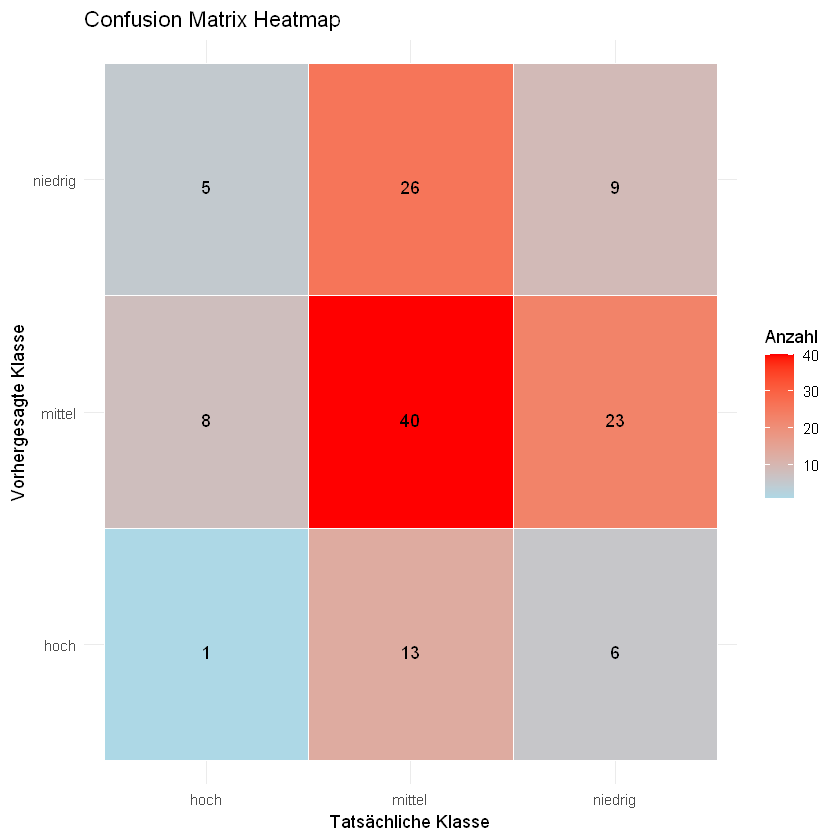

In [126]:

# Funktion zur Erstellung der Confusion Matrix
create_confusion_matrix <- function(predictions, actuals) {
  table(Predicted = predictions, Actual = actuals)
}

# Funktion zur Erstellung der Heatmap
plot_confusion_matrix_heatmap <- function(confusion_matrix) {
  # Konvertiere die Confusion Matrix in ein Format, das ggplot2 versteht
  cm_melted <- melt(as.matrix(confusion_matrix))
  
  # Erstelle die Heatmap mit ggplot2
  ggplot(data = cm_melted, aes(x = Actual, y = Predicted, fill = value)) +
    geom_tile(color = "white") +
    scale_fill_gradient(low = "lightblue", high = "red") +
    geom_text(aes(label = value), vjust = 1) +
    labs(title = "Confusion Matrix Heatmap",
         x = "Tatsächliche Klasse",
         y = "Vorhergesagte Klasse",
         fill = "Anzahl") +
    theme_minimal()
}

# Berechne Vorhersagen für die Heatmap
predictions <- sapply(1:nrow(features_test), function(i) {
  row_as_list <- as.list(features[i, , drop = FALSE])
  classify(decision_tree, row_as_list)
})

# Erstelle die Confusion Matrix
confusion_matrix <- create_confusion_matrix(predictions, target_test)

# Zeichne die Heatmap
plot_confusion_matrix_heatmap(confusion_matrix)


In [127]:
# Funktion zur Identifizierung falsch klassifizierter Datensätze
find_misclassified <- function(predictions, actuals, data) {
  misclassified_indices <- which(predictions != actuals)
  misclassified_data <- data[misclassified_indices, , drop = FALSE]
  return(misclassified_data)
}

# Berechne die Vorhersagen
predictions <- sapply(1:nrow(features_test), function(i) {
  row_as_list <- as.list(features[i, , drop = FALSE])
  classify(decision_tree, row_as_list)
})

# Finde die falsch klassifizierten Datensätze
misclassified_data <- find_misclassified(predictions, target_test, data)

# Ausgabe der falsch klassifizierten Datensätze
if (nrow(misclassified_data) > 0) {
  cat("Falsch klassifizierte Datensätze:\n")
  print(misclassified_data)
} else {
  cat("Alle Datensätze wurden korrekt klassifiziert.\n")
}


Falsch klassifizierte Datensätze:
    Alter Einkommen    Abschluss Geschlecht  Wohngebiet       Stellung
2      30     33284      Studium          w  Grossstadt       Arbeiter
3      40     32112   Realschule          w  Grossstadt   Angestellter
4      29     26957  Hauptschule          w  Kleinstadt   Angestellter
5      34    114385   Realschule          w  Kleinstadt        Beamter
9      36     25712      Studium          m  Grossstadt       Arbeiter
11     37     71573       Keiner          w  Kleinstadt Selbststaendig
13     40     28636   Realschule          m  Grossstadt       Arbeiter
15     24     64795      Studium          w Mittelstadt       Arbeiter
16     41     25123    Promotion          m        Dorf   Angestellter
17     35     31385       Keiner          m Mittelstadt       Arbeiter
18     41     90849   Realschule          w  Grossstadt Selbststaendig
19     42     74534      Studium          w  Kleinstadt       Arbeiter
22     27     28446      Studium          m